8.11 Conformal mapping via convex optimization

Since we want to maximize the norm of the derivative at zero, which is just $|\alpha_n|$,

we apply a rotation such that $\alpha_n\in\mathbb{R}$.

In [2]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

In [82]:
# data for approximate conformal mapping problem.
# generate boundary of original region to map
N = 360  # number of boundary sample points
theta = 2 * np.pi * np.arange(1, N + 1) / N
r = 1 + 0.1 * np.cos(theta) - 0.15 * np.sin(2 * theta) + 0.1 * np.cos(3 * theta)
b = r * np.cos(theta) + 1j * r * np.sin(theta)  # boundary of region
n = 5  # degree of polynomial to optimize over
a = 0  # point in the interior of region

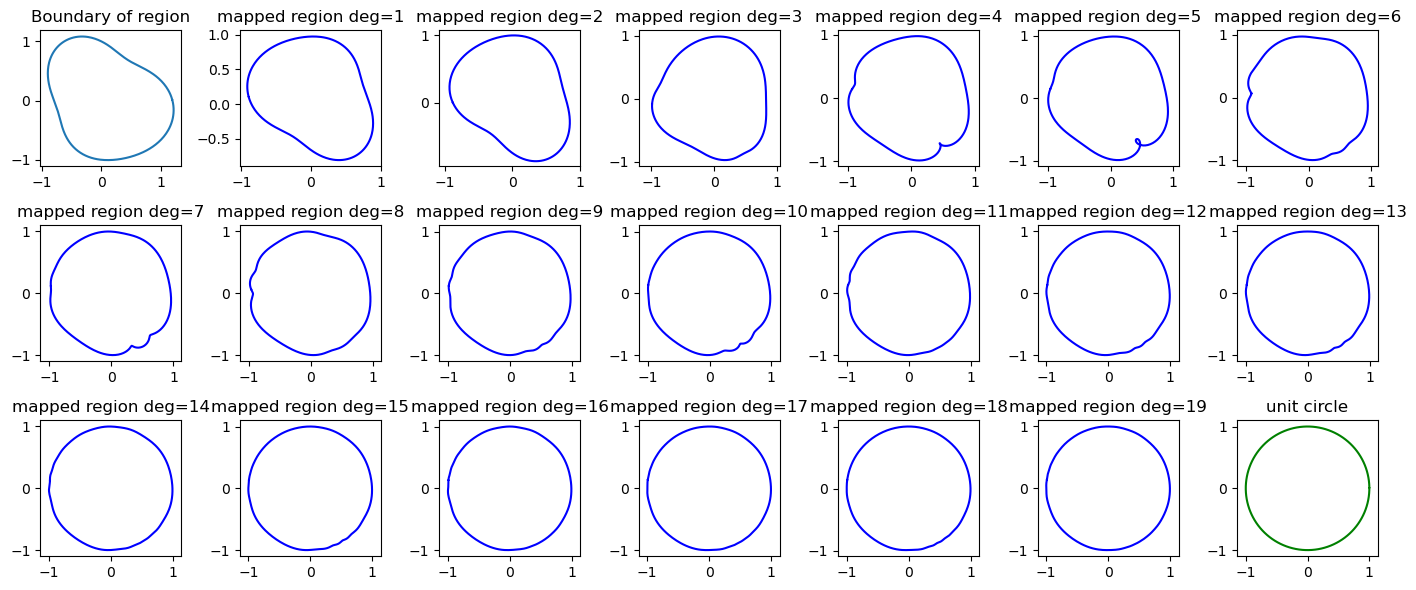

In [102]:
plt.figure(figsize=(14,6))
for i, n in enumerate(np.arange(1,20)):
    alpha = cp.Variable((1,n+1), complex=True)
    objective = cp.Minimize(cp.real(alpha[:,-2]))
    constraints = [
        cp.imag(alpha[:,-2]) == 0,
        cp.norm(np.power.outer(b, np.arange(n,-1,-1)) @ alpha.T, axis=1) <= 1
    ]
    prob = cp.Problem(objective, constraints)
    result = prob.solve()

    w = np.power.outer(b, np.arange(n,-1,-1)) @ alpha.value.T  # (boundary of) mapped region
    # plot boundary of the mapped region
    plt.subplot(3, 7, 2+i)
    plt.plot(np.real(w), np.imag(w), 'b')
    plt.title(f'mapped region deg={n}')
    plt.axis('equal')
    #plt.axis([-1.5, 1.5, -1.5, 1.5])

# plot boundary of $\Omega$, the unmapped region
plt.subplot(3, 7, 1)
plt.plot(np.real(b), np.imag(b))
plt.title('Boundary of region')
plt.axis('equal')
#plt.axis([-1.5, 1.5, -1.5, 1.5])
# plot of a unit circle
plt.subplot(3, 7, 21)
plt.plot(np.cos(theta), np.sin(theta), 'g')
plt.title('unit circle')
plt.axis('equal')
#plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.tight_layout()
plt.show()